# Project Introduction

The question that our group is trying to find the answer for is "What is leading to the decline in cigarette use?". We know that a decline is happening but we want to know why, that way this trend can continue. A couple of hypotheses that we have are that "The rise of e-cigarette use is much larger than the rate of cigarettes not being used" and "Young adults are using e-cigarettes more than those who quit smoking".

The data that we are using is about the use of cigarettes and other types of tobacco throughout the years for different age groups and other demographics. This data comes from the website for the Centers of Disease Control and Prevention (cdc.gov). The data set that we are using contains data about risk factors of tobacco use in the U.S. from 2011-2017; it contains 33,451 rows and has information about tobacco use in each state categorized by race, gender, age, education level, and type of combustible used by %.

# Any Changes

Our scope at the beginning of the project was to find the exact reasons for a lot less people smoking now compared to in previous years, but we realized that it will not be possible to do that in the time we have. So we are just sticking to seeing the percentages of demographics (mainly age) of people that have stopped smoking, switched from smoking to vaping, or simply started vaping throughout the years. In terms of our data, we originally were going to use two datasets but stuck with one of them since it had all of the information that we wanted.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Data Cleaning

In [3]:
tobacco_use = pd.read_csv('Behavioral_Risk_Factor_Data__Tobacco_Use__2011_to_present_.csv')

tobacco_use = tobacco_use[tobacco_use.Data_Value_Footnote_Symbol != '*']
#Removing rows from df which have a small sample size, denoted by '*' in the Data_Value_Footnote_Symbol column

tobacco_use = tobacco_use[tobacco_use.YEAR != '2011-2012']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2012-2013']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2013-2014']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2014-2015']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2015-2016']
tobacco_use = tobacco_use[tobacco_use.YEAR != '2016-2017']
tobacco_use = tobacco_use[tobacco_use.YEAR != 2011]

def drop_columns(tobacco_use): #Function to drop the columns that we do not need
    return tobacco_use.drop(columns = ['LocationDesc', 'TopicType', 'Data_Value_Type', 'Data_Value_Std_Err', 
                                    'Low_Confidence_Limit', 'High_Confidence_Limit', 'GeoLocation', 'TopicId',
                                    'MeasureId', 'StratificationID1', 'StratificationID2', 'StratificationID3',
                                    'StratificationID4', 'SubMeasureID', 'DisplayOrder', 'DataSource',
                                      'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'TopicTypeId'])

tu_df = (tobacco_use.pipe(drop_columns)) #Calling function to drop unneeded columns from df

tu_df.head(10) #Display first 10 elements of the dataframe

C:\Users\Iqra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,YEAR,LocationAbbr,TopicDesc,MeasureDesc,Response,Data_Value_Unit,Data_Value,Sample_Size,Gender,Race,Age,Education
0,2017,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.0,NaN,Overall,All Races,All Ages,All Grades
1,2017,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,96.0,NaN,Overall,All Races,All Ages,All Grades
2,2012,US,Cigarette Use (Adults),Smoking Status,Former,%,25.2,NaN,Overall,All Races,All Ages,All Grades
3,2012,US,Cigarette Use (Adults),Smoking Status,Never,%,54.4,NaN,Overall,All Races,All Ages,All Grades
4,2012,US,Smokeless Tobacco Use (Adults),Current Use,NaN,%,4.1,NaN,Overall,All Races,All Ages,All Grades
5,2012,US,Smokeless Tobacco Use (Adults),User Status,Current,%,4.1,NaN,Overall,All Races,All Ages,All Grades
6,2012,US,Smokeless Tobacco Use (Adults),User Status,Not Current,%,95.9,NaN,Overall,All Races,All Ages,All Grades
15,2016,US,Cessation (Adults),Percent of Former Smokers Among Ever Smokers,NaN,%,60.2,NaN,Overall,All Races,All Ages,All Grades
105,2017,AL,Cigarette Use (Adults),Smoking Status,Current,%,23.4,2598.0,Male,All Races,All Ages,All Grades
158,2016,US,Cessation (Adults),Quit Attempt in Past Year Among Every Day Ciga...,NaN,%,50.9,NaN,Overall,All Races,All Ages,All Grades


# Exploratory Data Analysis

C:\Users\Iqra\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Percentage of Cigarette Smokers')

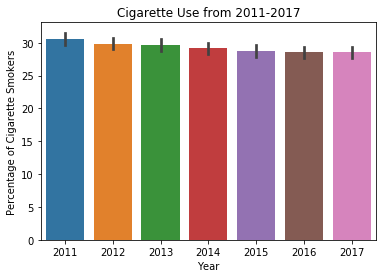

In [4]:
tu_df = tobacco_use[tobacco_use.LocationAbbr != 'US']
tu_df = tobacco_use[tobacco_use.Response != 'Former']
tu_df = tobacco_use[tobacco_use.Response != 'Never']
tu_df = tobacco_use[tobacco_use.TopicDesc == 'Cigarette Use (Adults)']
tu_df.sort_values(by=['YEAR'])

bars = sns.barplot(x='YEAR', y='Data_Value', data=tu_df)

bars.set_title('Cigarette Use from 2011-2017')
bars.set_xlabel('Year')
bars.set_ylabel('Percentage of Cigarette Smokers')

Our data is tabular and contained within .csv files. After some data cleaning, our data has a rectangular structure containing both quantitative and categorical data. It is relatively granular, with some categories such as education and gender able to possibly be further granulized. Also, the scope of our data is relevant to us and is not too expansive since we are concerned with cigarette usage within the US. Our data is relatively faithful, however there are columns in which there are missing/default values.

# Visualization

Text(0.5, 1.0, 'Ages 20+ with higher level of education are our biggest audience ')

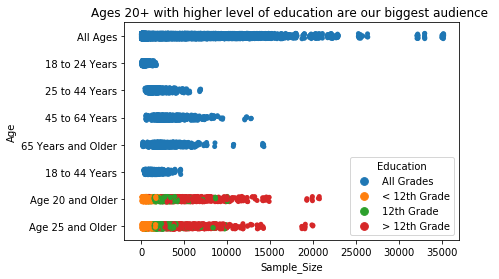

In [6]:
ax = sns.stripplot(x="Sample_Size", y="Age", hue="Education", data=tobacco_use, jitter=True)
ax.set_title('Ages 20+ with higher level of education are our biggest audience ')

Our biggest target audience are people that are beyond their highschool years and are still studying. They seem to have the most pressure on themselves to perform and achieve great things in life. They are just starting out in their career lives and starting to become real adults.

# ML Analysis

# Reflection

# Next Steps